In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.measurements


In [2]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = copy.deepcopy(cmap)
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.75, N+4)
    return mycmap
tgray = transparent_cmap(plt.cm.gray)
tpurp = transparent_cmap(plt.cm.Purples)
tblue = transparent_cmap(plt.cm.Blues)
tgreen = transparent_cmap(plt.cm.Greens)
torange = transparent_cmap(plt.cm.Oranges)
tred = transparent_cmap(plt.cm.Reds)



In [4]:
from p2ch13.diagnose import LunaDiagnoseApp
dapp = LunaDiagnoseApp([
    "--series-uid=1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860", 
    #"--classification-path=data/part2/models/alternate_cls_2019-06-16_14.18.58_ch12-other-model.best.state",
])

2019-06-25 21:15:18,335 DEBUG    pid:14636 p2ch13.diagnose:124:initModels data\part2\models\seg_2019-06-23_21.45.47_norm-ct-and-mask.best.state
2019-06-25 21:15:18,385 DEBUG    pid:14636 p2ch13.diagnose:132:initModels data\part2\models\cls_2019-06-23_14.57.45_redo.best.state


In [6]:
series_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"
series_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207"
ct, output_a, mask_a, clean_a = dapp.segmentCt(series_uid)

pos_ndx = 137

_ = """
1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207 ----/816, starting
2019-06-17 00:13:31,307 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207   16/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:31,436 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207   32/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:31,691 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207   64/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:32,209 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207  128/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:33,252 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207  256/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:35,354 INFO     pid:28888 util.util:255:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207  512/816, done at 2019-06-17 00:13:37, 0:00:06
2019-06-17 00:13:38,005 WARNING  pid:28888 util.util:268:enumerateWithEstimate Cls 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207 ----/816, done at 2019-06-17 00:13:38
2019-06-17 00:13:38,005 INFO     pid:28888 __main__:351:logResults Testing 1.3.6.1.4.1.14519.5.2.1.6279.6001.216252660192313507027754194207 Mal:True  Pred:True  Correct:True  Value:0.9972373247146606 tensor([137., 314., 146.])
2019-06-17 00:13:38,006 INFO     pid:28888 p2ch13.dsets:511:__init__ <p2ch13.dsets.Luna2dSegmentationDataset object at 0x7f5b22799ef0>: 1 g
"""


2019-06-25 21:16:23,619 INFO     pid:14636 p2ch13.dsets:519:__init__ <p2ch13.dsets.Luna2dSegmentationDataset object at 0x000002616CFB4278>: 1 general series, 268 slices


(array([  1012,     18,     21,      8,      2,      9,      8,      9,
            15, 261042], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

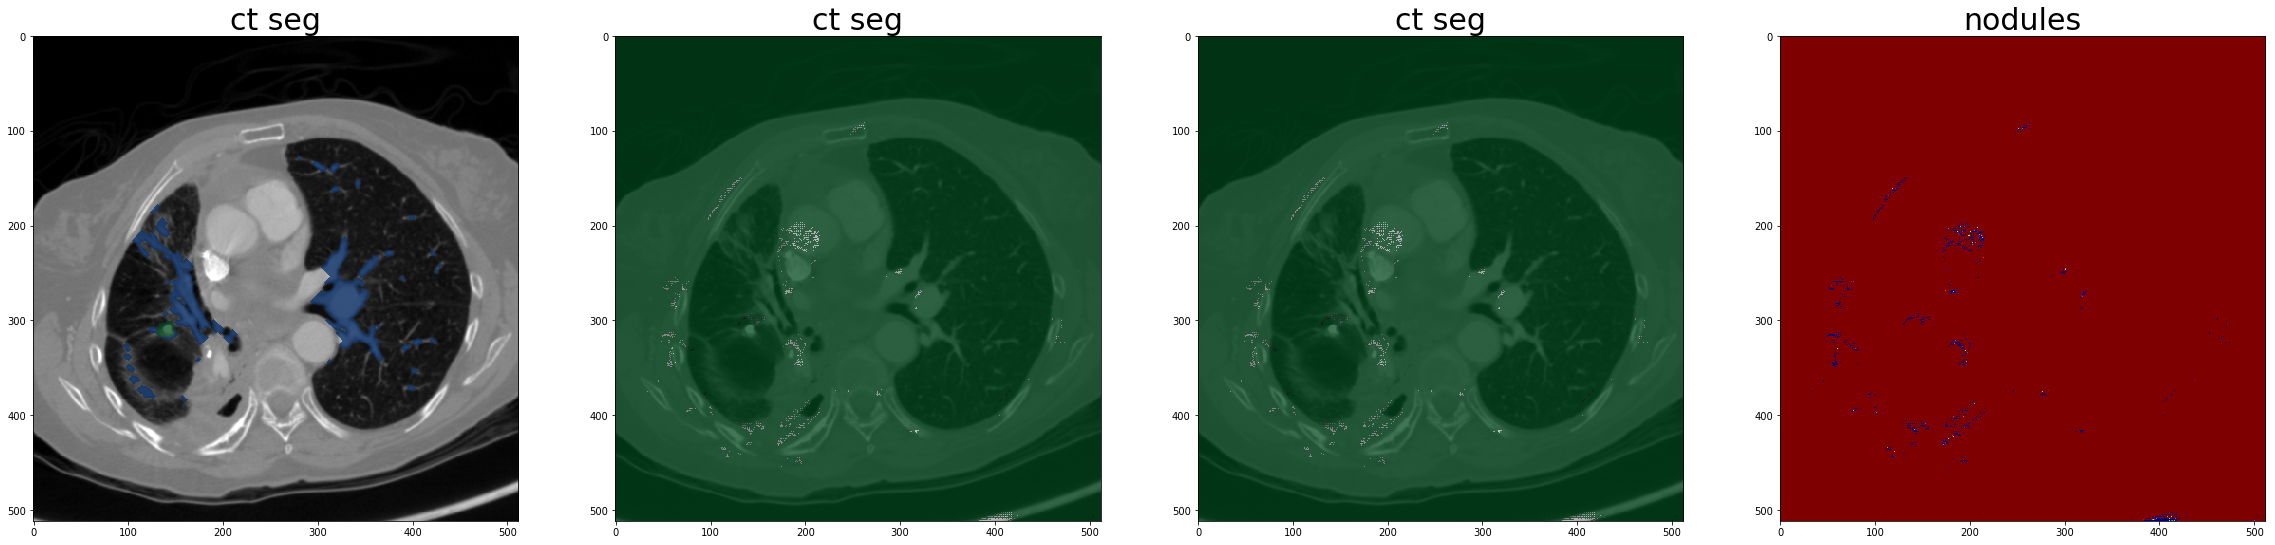

In [12]:

#print(output_a.shape, candidate_count)
#plt.imshow(output_a[100], cmap='jet')

mask_tup = ct.build2dLungMask(pos_ndx)

fig = plt.figure(figsize=(40,10))

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('ct seg', fontsize=30)
plt.imshow(ct.hu_a[pos_ndx], clim=(-1000, 1000), cmap='gray')
plt.imshow(mask_tup.neg_mask, cmap=tblue)
plt.imshow(mask_tup.pos_mask, cmap=tgreen)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('ct seg', fontsize=30)
plt.imshow(ct.hu_a[pos_ndx], clim=(-1000, 1000), cmap='gray')
plt.imshow(output_a[pos_ndx], cmap=tgreen)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('ct seg', fontsize=30)
plt.imshow(ct.hu_a[pos_ndx], clim=(-1000, 1000), cmap='gray')
plt.imshow(mask_a[pos_ndx], cmap=tgreen)


subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('nodules', fontsize=30)
plt.imshow(output_a[pos_ndx], cmap='jet')

np.histogram(output_a[pos_ndx])

In [ ]:
plt.imshow(ct.hu_a[100])

In [ ]:
mask_a = output_a > 0.5
clean_a = scipy.ndimage.morphology.binary_closing(mask_a, iterations=2)
nl_a, n_count = scipy.ndimage.measurements.label(clean_a)
print(n_count)
plt.imshow(nl_a[100], cmap='jet')

In [ ]:
a = [
    [1, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
]
nl_a, n_count = scipy.ndimage.measurements.label(np.array(a))
print(n_count)
plt.imshow(nl_a, cmap='jet')

In [ ]:
b = np.array(([0,1,1,0],
              [0,1,0,0],
              [0,0,0,0],
              [0,0,1,1],
              [0,0,1,1]))
lbl = scipy.ndimage.label(b)[0]
scipy.ndimage.measurements.center_of_mass(b, lbl, [1,2])
#scipy.ndimage.measurements.center_of_mass(b, lbl)

In [ ]:
from util.util import xyz2irc, irc2xyz

a = (1, 2, 3)
b = xyz2irc(a, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
c = irc2xyz(b, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)

a, b, c